In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('D:/data.csv')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
missing_values = data.isna().sum()
missing_values

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()
data['city']=le.fit_transform(data['city'])
data['city']

0       36
1       35
2       18
3        3
4       31
        ..
4595    35
4596     3
4597    32
4598    35
4599     9
Name: city, Length: 4600, dtype: int32

In [6]:
x = (data[['bedrooms','sqft_living','city']]).values
x

array([[3.00e+00, 1.34e+03, 3.60e+01],
       [5.00e+00, 3.65e+03, 3.50e+01],
       [3.00e+00, 1.93e+03, 1.80e+01],
       ...,
       [3.00e+00, 3.01e+03, 3.20e+01],
       [4.00e+00, 2.09e+03, 3.50e+01],
       [3.00e+00, 1.49e+03, 9.00e+00]])

In [7]:
y=data['price'].values
y

array([ 313000.      , 2384000.      ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
x_test

array([[3.00e+00, 2.09e+03, 9.00e+00],
       [4.00e+00, 2.64e+03, 3.20e+01],
       [1.00e+00, 6.50e+02, 1.80e+01],
       ...,
       [4.00e+00, 4.23e+03, 4.20e+01],
       [4.00e+00, 1.53e+03, 3.50e+01],
       [2.00e+00, 1.21e+03, 3.50e+01]])

In [11]:
y_test

array([289000.      , 429900.      , 129000.      , ..., 985000.      ,
       135333.333333, 380000.      ])

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_prediction=model.predict(x_test)
y_prediction

array([ 495061.02743569,  682542.65899012,  212174.9087644 , ...,
       1174433.57496726,  373605.42834749,  381818.99340431])

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [15]:
linear_reg_rmse = np.sqrt(mean_squared_error(y_test,y_prediction))
linear_reg_rmse
print("Linear Regression RMSE:", linear_reg_rmse)

Linear Regression RMSE: 756185.0478526114


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rr = RandomForestRegressor()
model2 = rr.fit(x_train,y_train)
y_prediction2 = model2.predict(x_test)
y_prediction2

array([356952.33333333, 543741.08888892, 194885.        , ...,
       606565.9       , 416735.45384616, 403470.04503968])

In [21]:
random_forest_rmse = np.sqrt(mean_squared_error(y_test, y_prediction2))
random_forest_rmse
print("Random Forest Regression RMSE:", random_forest_rmse)

Random Forest Regression RMSE: 759137.0148551735


In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dr = DecisionTreeRegressor()
model3 = dr.fit(x_train,y_train)
y_prediction3 = model3.predict(x_test)
y_prediction3

array([290000., 585000., 299000., ..., 405125., 352000., 401400.])

In [24]:
decision_tree_rmse = np.sqrt(mean_squared_error(y_test, y_prediction3))
decision_tree_rmse
print("Decision Tree Regression RMSE:", decision_tree_rmse)

Decision Tree Regression RMSE: 778779.0553210351


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
gbr = GradientBoostingRegressor()
model4 = gbr.fit(x_train,y_train)
y_prediction4 = model4.predict(x_test)
y_prediction4

array([375452.41588412, 528295.64698152, 169654.50277014, ...,
       800048.22045703, 452684.83360526, 408247.47569479])

In [27]:
gradient_boosting_rmse = np.sqrt(mean_squared_error(y_test, y_prediction4))
gradient_boosting_rmse
print("Gradient Boosting Regression RMSE:", gradient_boosting_rmse)

Gradient Boosting Regression RMSE: 748414.036750823


In [28]:
import matplotlib.pyplot as plt

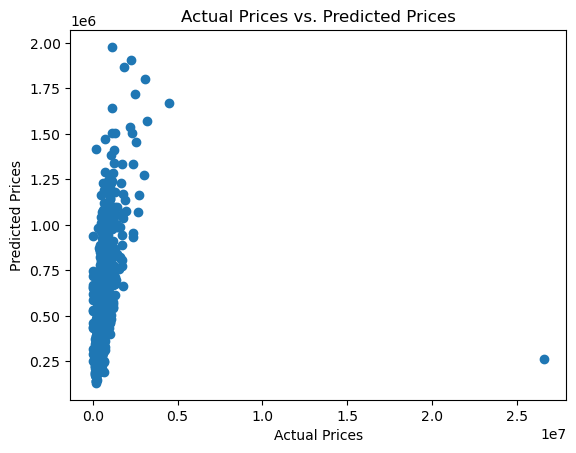

In [29]:
plt.scatter(y_test, y_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()